In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

dataTrain = pd.read_csv('Crop.csv')

dataTrain.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,120000


In [ ]:
type(dataTrain)

pandas.core.frame.DataFrame

In [ ]:
dataTrain.shape

(2200, 9)

In [ ]:
dataTrain.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
Yield          0
dtype: int64

In [ ]:
dataTrain = dataTrain.dropna()

In [ ]:
dataTrain.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
Yield          0
dtype: int64

In [ ]:
dataTrain.shape

(2200, 9)

In [ ]:
dataTrain.dtypes

Nitrogen         int64
Phosphorus       int64
Potassium        int64
Temperature    float64
Humidity       float64
pH_Value       float64
Rainfall       float64
Crop            object
Yield            int64
dtype: object

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
corr = dataTrain.corr()
##This is a pandas DataFrame method that is used to calculate the correlation between variables in the DataFrame.
sns.heatmap(corr,annot=True)
plt.show()

ValueError: could not convert string to float: 'Rice'

<Figure size 1000x600 with 0 Axes>

In [ ]:
dataTrain.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Yield
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,2689.228182
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,3710.361267
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,2.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,950.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,1825.000000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,3500.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,120000.000000


In [ ]:
dataTrain.loc[dataTrain['Yield'] == 1, 'Yield'] = 600

In [ ]:
dataTrain.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Yield
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,2689.228182
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,3710.361267
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,2.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,950.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,1825.000000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,3500.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,120000.000000


<Axes: xlabel='Phosphorus', ylabel='Yield'>

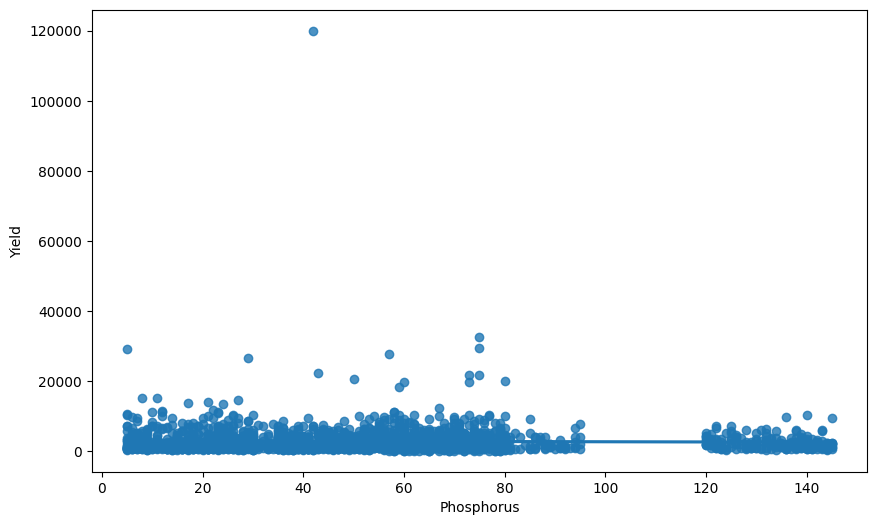

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x="Phosphorus", y="Yield", data=dataTrain)

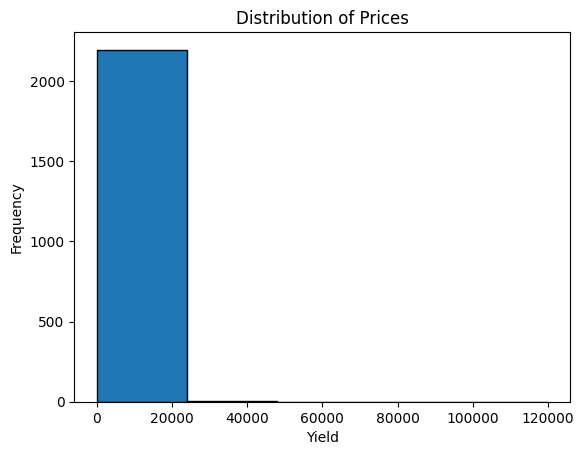

In [ ]:
import matplotlib.pyplot as plt

dataTrain['Yield'].plot(kind = 'hist', bins = 5, edgecolor='black')   # 5 bins are used
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

In [ ]:
dataTrain.describe(include = 'object')

,Crop
count,2200
unique,22
top,Rice
freq,100


<Axes: xlabel='Nitrogen', ylabel='Yield'>

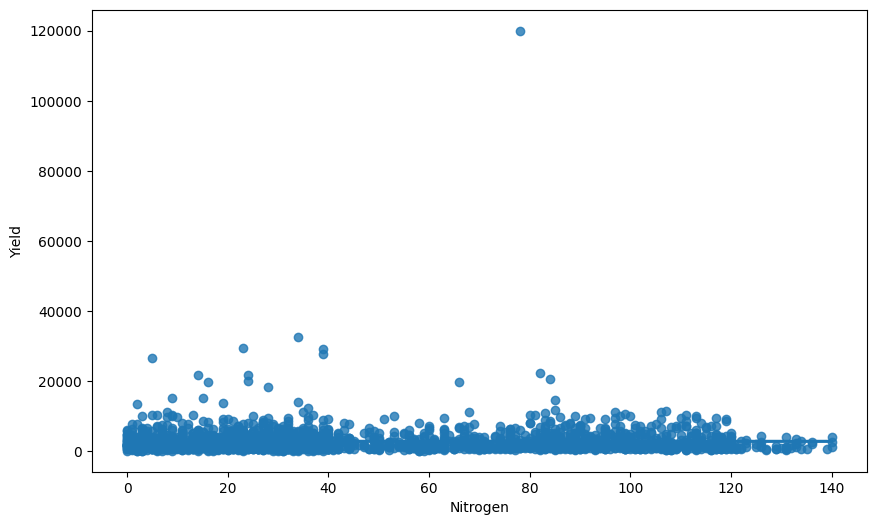

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x="Nitrogen", y="Yield", data=dataTrain)

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['Nitrogen'], dataTrain['Yield'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.0013015300742413606  with a P-value of P = 0.9513492519737153


<Axes: xlabel='Phosphorus', ylabel='Yield'>

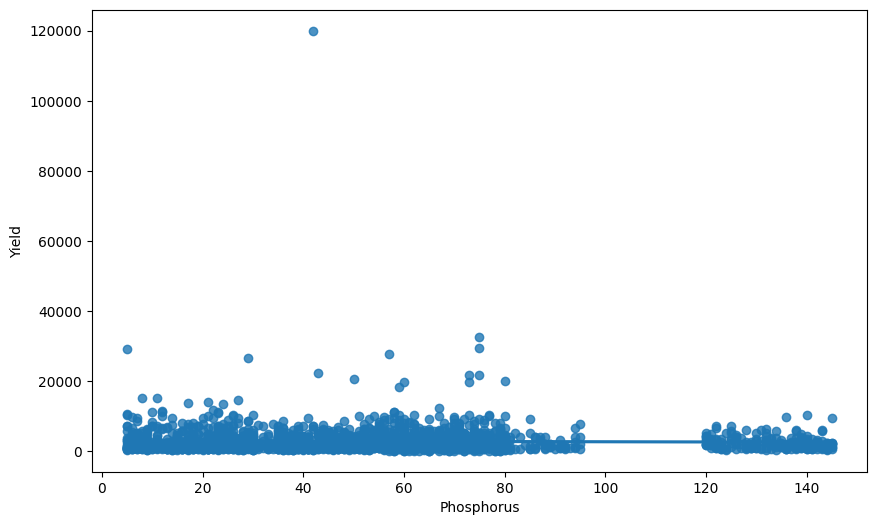

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x="Phosphorus", y="Yield", data=dataTrain)

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['Phosphorus'], dataTrain['Yield'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.023683324400949893  with a P-value of P = 0.26683928184702016


<Axes: xlabel='Potassium', ylabel='Yield'>

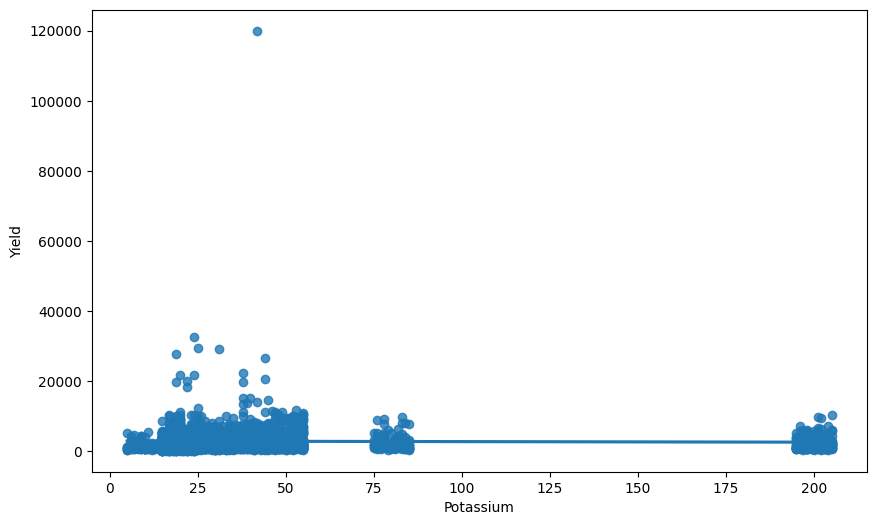

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x="Potassium", y="Yield", data=dataTrain)

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['Potassium'], dataTrain['Yield'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.02192250167637105  with a P-value of P = 0.3040459888935599


<Axes: xlabel='Temperature', ylabel='Yield'>

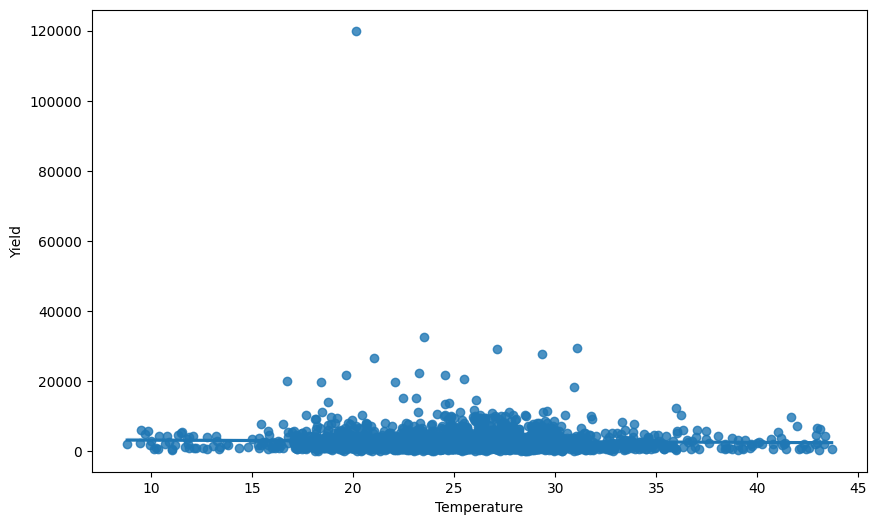

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x="Temperature", y="Yield", data=dataTrain)

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['Temperature'], dataTrain['Yield'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.029044338433827026  with a P-value of P = 0.17325682273046206


<Axes: xlabel='Humidity', ylabel='Yield'>

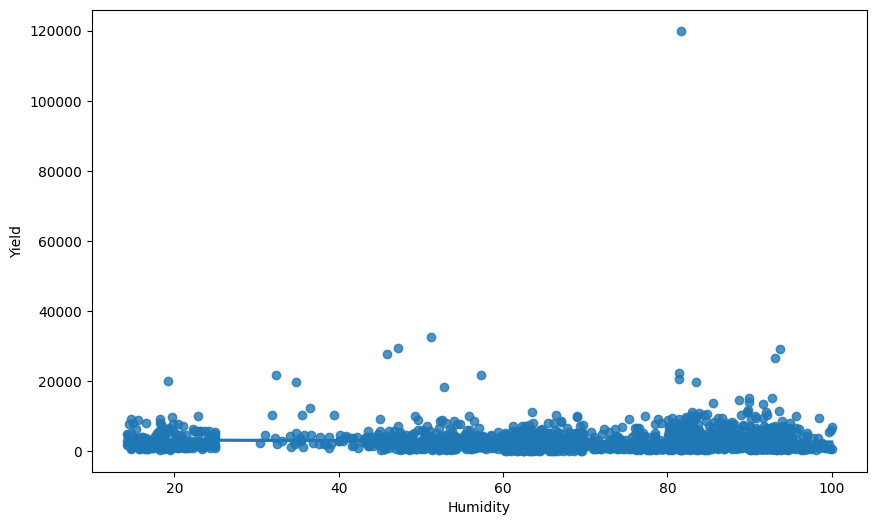

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x="Humidity", y="Yield", data=dataTrain)

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['Humidity'], dataTrain['Yield'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.04141392664953862  with a P-value of P = 0.052111126710953797


<Axes: xlabel='pH_Value', ylabel='Yield'>

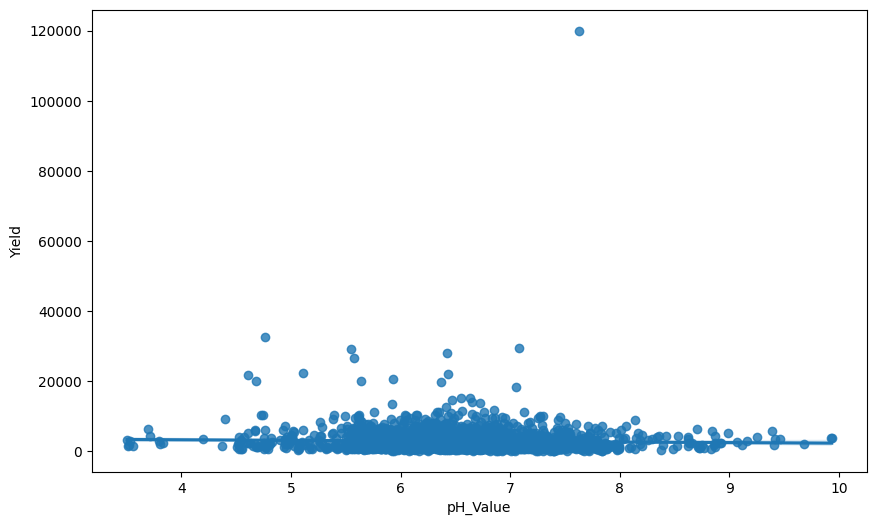

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x="pH_Value", y="Yield", data=dataTrain)

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['pH_Value'], dataTrain['Yield'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.03354751400905145  with a P-value of P = 0.11570345226055727


<Axes: xlabel='Rainfall', ylabel='Yield'>

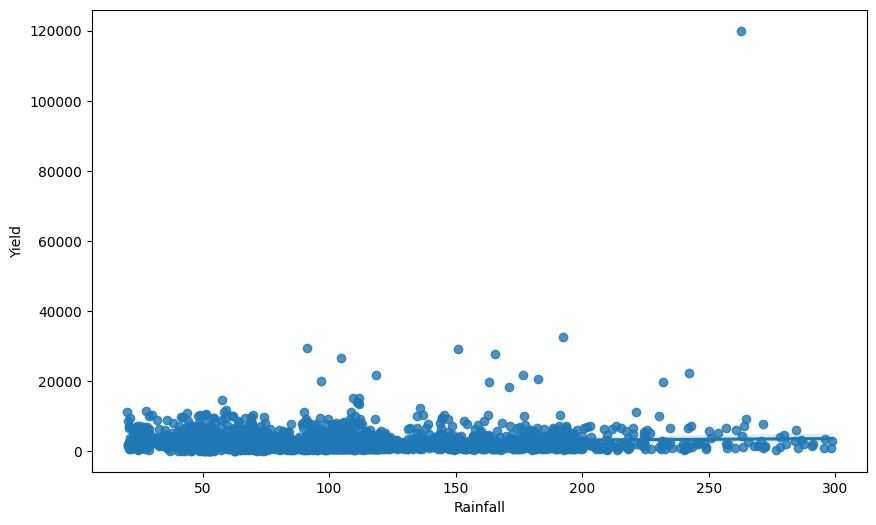

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x="Rainfall", y="Yield", data=dataTrain)

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['Rainfall'], dataTrain['Yield'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.058847111153453584  with a P-value of P = 0.005762497342397069


<Axes: xlabel='Nitrogen', ylabel='Yield'>

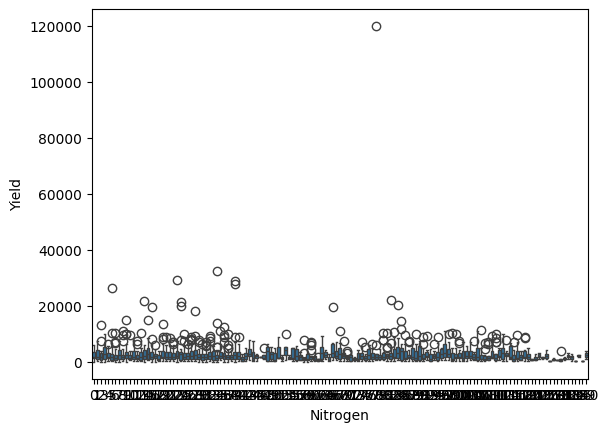

In [ ]:
sns.boxplot(x="Nitrogen", y="Yield", data=dataTrain)

<Axes: xlabel='Phosphorus', ylabel='Yield'>

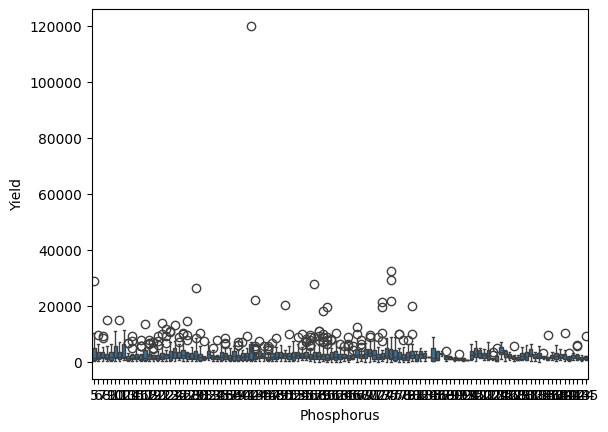

In [ ]:
sns.boxplot(x="Phosphorus", y="Yield", data=dataTrain)

<Axes: xlabel='Potassium', ylabel='Yield'>

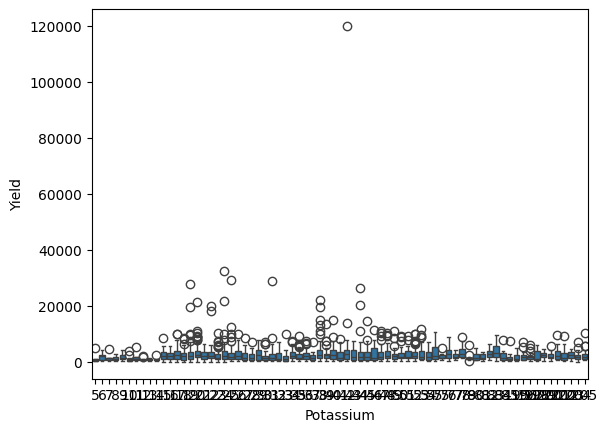

In [ ]:
sns.boxplot(x="Potassium", y="Yield", data=dataTrain)

<Axes: xlabel='Temperature', ylabel='Yield'>

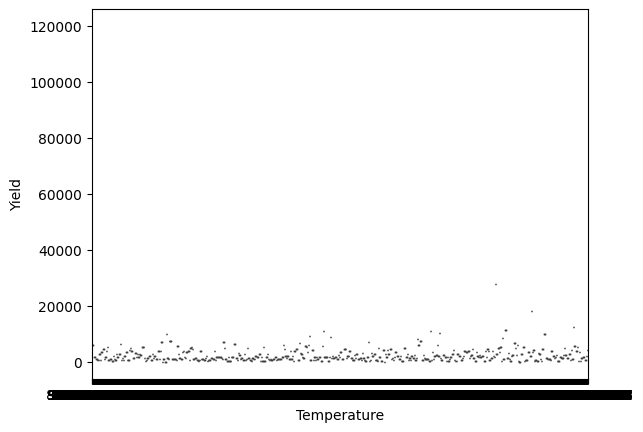

In [ ]:
sns.boxplot(x="Temperature", y="Yield", data=dataTrain)

<Axes: xlabel='Humidity', ylabel='Yield'>

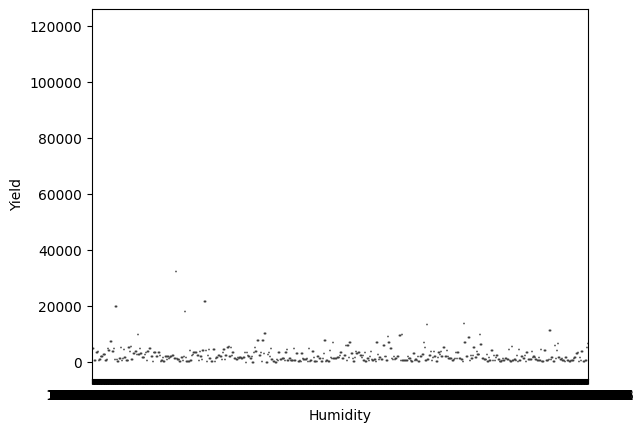

In [ ]:
sns.boxplot(x="Humidity", y="Yield", data=dataTrain)

<Axes: xlabel='pH_Value', ylabel='Yield'>

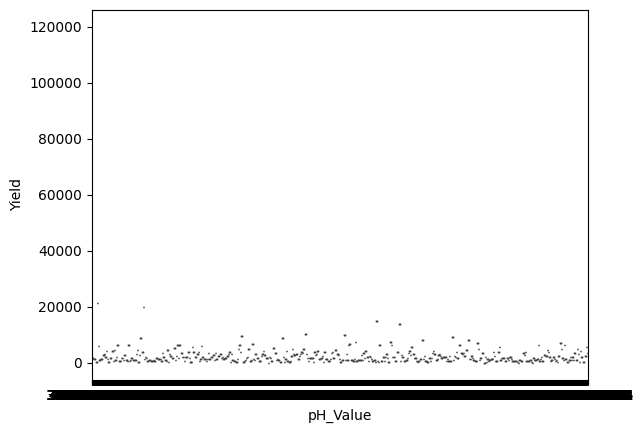

In [ ]:
sns.boxplot(x="pH_Value", y="Yield", data=dataTrain)

<Axes: xlabel='Rainfall', ylabel='Yield'>

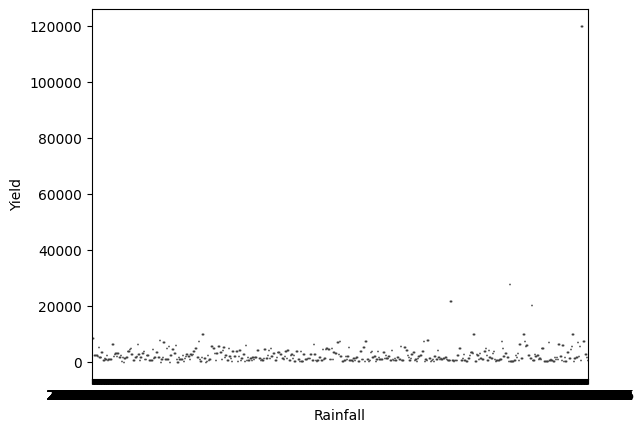

In [ ]:
sns.boxplot(x="Rainfall", y="Yield", data=dataTrain)

In [ ]:
dataTrain.drop(['Humidity', 'pH_Value', 'Potassium','Rainfall'], axis = 1, inplace = True)

In [ ]:
dataTrain.describe()

,Nitrogen,Phosphorus,Temperature,Yield
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,25.616244,2689.228182
std,36.917334,32.985883,5.063749,3710.361267
min,0.000000,5.000000,8.825675,2.000000
25%,21.000000,28.000000,22.769375,950.000000
50%,37.000000,51.000000,25.598693,1825.000000
75%,84.250000,68.000000,28.561654,3500.000000
max,140.000000,145.000000,43.675493,120000.000000


In [ ]:
dataTrain.shape

(2200, 5)

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dataTrain['Nitrogen'] = labelencoder.fit_transform(dataTrain.Nitrogen)
dataTrain['Phosphorus'] = labelencoder.fit_transform(dataTrain.Phosphorus)
dataTrain['Temperature'] = labelencoder.fit_transform(dataTrain.Temperature)




In [ ]:
dataTrain.head(10)

,Nitrogen,Phosphorus,Temperature,Crop,Yield
0,90,37,361,Rice,7000
1,85,53,437,Rice,5000
2,60,50,583,Rice,7000
3,74,30,1279,Rice,7000
4,78,37,307,Rice,120000
5,69,32,593,Rice,3500
6,69,50,540,Rice,7500
7,94,48,319,Rice,6500
8,89,49,862,Rice,10000
9,68,53,626,Rice,11000


In [ ]:
import scipy.stats as stats

In [ ]:
dataTrain = stats.zscore(dataTrain)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
x_train=dataTrain.iloc[:,0:3]
y_train=dataTrain.iloc[:,4]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [ ]:
x_train.head()

,Nitrogen,Phosphorus,Temperature
1234,20,113,13
998,39,19,706
556,19,31,1066
116,70,42,878
1819,31,1,1758


In [ ]:
y_train.head()

1234    2400
998     2200
556     1800
116     1500
1819     900
Name: Yield, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_mlr = model.fit(x_train,y_train)

In [ ]:
y_pred1 = model_mlr.predict(x_test)

In [ ]:
y_test_first_element = y_test.iloc[0]

In [ ]:
y_test_first_element = y_test.get(0, None)

In [ ]:
y_test_first_element = y_test.get(0, None)

In [ ]:
y_pred1[0]

2580.409852569948

In [ ]:
mse1 = mean_squared_error(y_test, y_pred1)
print('The mean square error for Multiple Linear Regression: ', mse1)

The mean square error for Multiple Linear Regression:  13011368.565060439


In [ ]:
mae2= mean_absolute_error(y_test, y_pred1)
print('The mean absolute error for Multiple Linear Regression: ', mse1)

The mean absolute error for Multiple Linear Regression:  13011368.565060439


In [ ]:
rf = RandomForestRegressor()
model_rf = rf.fit(x_train,y_train)

In [ ]:
y_pred2 = model_rf.predict(x_test)

In [ ]:
mae2 = mean_squared_error(y_test, y_pred2)
print('The mean square error of price and predicted value is: ', mae2)

The mean square error of price and predicted value is:  13286526.553590909


In [ ]:
LassoModel = Lasso()
model_lm = LassoModel.fit(x_train,y_train)

In [ ]:
y_pred3 = model_lm.predict(x_test)

In [ ]:
mae3= mean_absolute_error(y_test, y_pred3)
print('The mean absolute error of price and predicted value is: ', mae3)

The mean absolute error of price and predicted value is:  2100.9165178427356


In [ ]:
mse3 = mean_squared_error(y_test, y_pred3)
print('The mean square error of price and predicted value is: ', mse3)

The mean square error of price and predicted value is:  13011336.402413743


In [ ]:
scores = [('MLR', mse1),
          ('Random Forest', mse2),
          ('LASSO', mse3)]

In [ ]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,MLR,1.301137e+07
1,Random Forest,1.328653e+07
2,LASSO,1.301134e+07


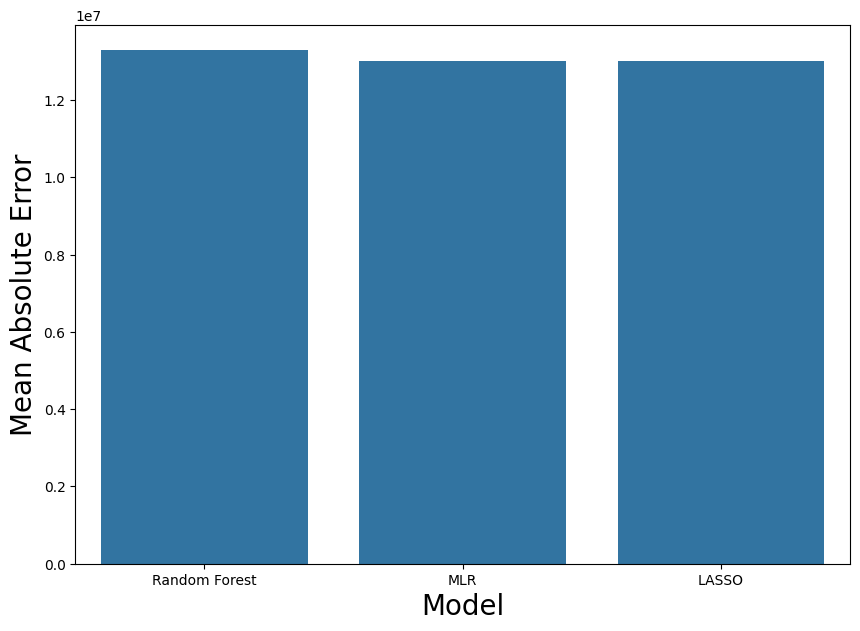

In [ ]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()